# Diamond Price Prediction using Machine Learning

The goal of this project is to create a stable model to predict the prices of the diamonds 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data=df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data["cut"].value_counts()        # counting diamonds based on the cut

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### Data Cleaning

In [8]:
# Handling Missing Values
#For particular attributes using integer
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
#for attributes bool
df.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [10]:
# Methods to handle with NaN values
# df.fillna(0)
# df.dropna()

In [11]:
# Dropping the unnecessary column Unnamed:0
data.drop(columns='Unnamed: 0', axis = 1, inplace=True)

In [12]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
data.shape

(53940, 10)

## Data Visualizations

Plotting histograms to get an idea about the features of dataset

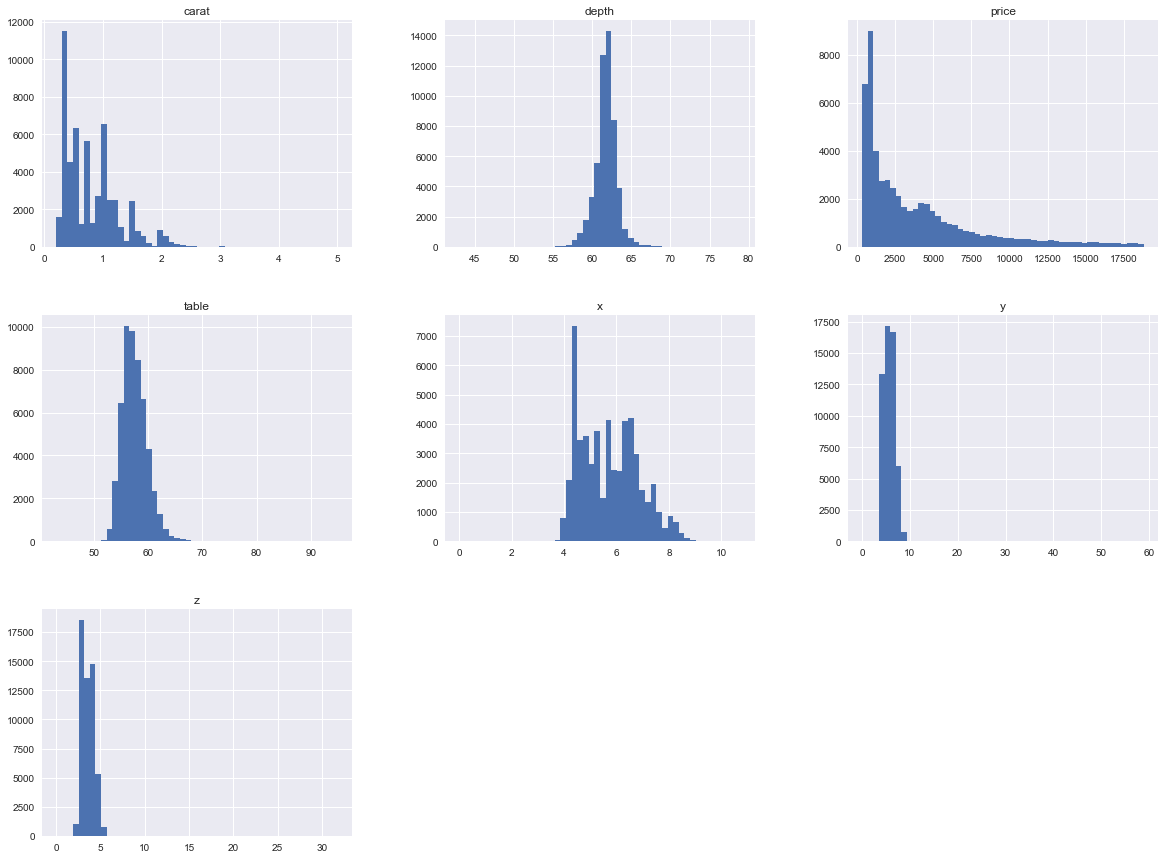

In [14]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

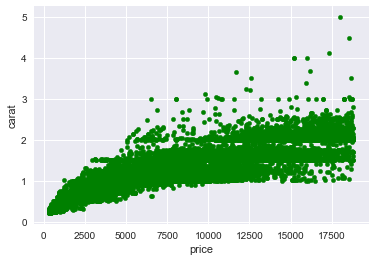

In [15]:
data.plot( kind="scatter", x="price", y="carat",color="g")
plt.show()

### Count plots of different categorical features of diamonds

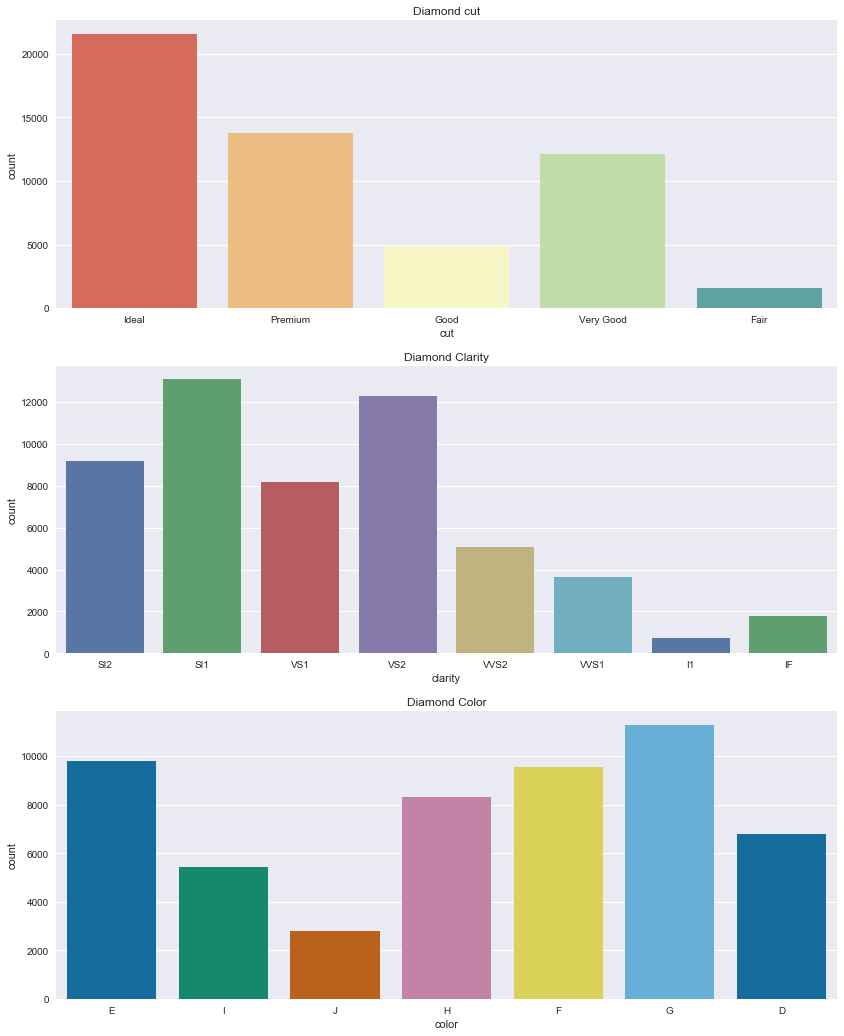

In [16]:
fig, ax = plt.subplots(3, figsize = (14,18))
sns.countplot('cut',data=data, ax=ax[0],palette="Spectral")
sns.countplot('clarity',data=data , ax=ax[1],palette="deep")
sns.countplot('color',data=data, ax=ax[2],palette="colorblind")
ax[0].set_title("Diamond cut")
ax[1].set_title("Diamond Clarity")
ax[2].set_title("Diamond Color")
plt.show()

### Comparison of carat with price based on diamond cut

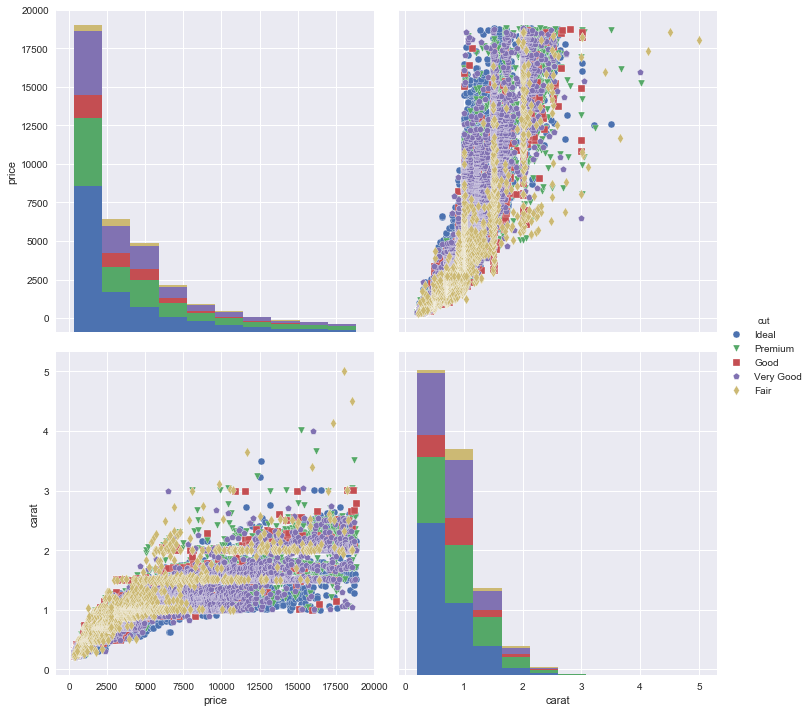

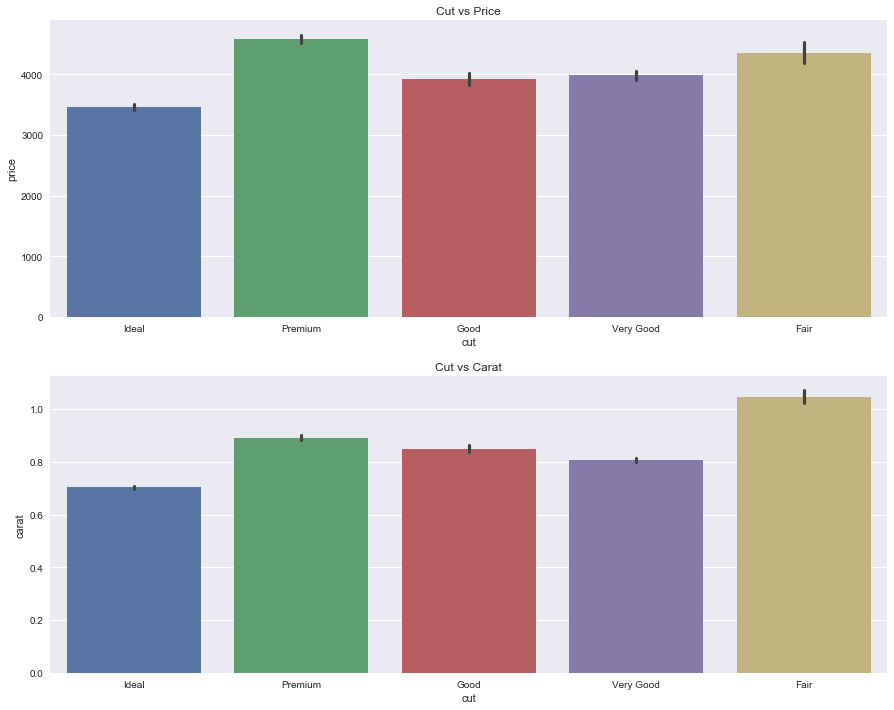

In [17]:
g=sns.pairplot(data[["price","carat","cut"]], markers = ["o","v","s","p","d"],hue="cut",size=5)
plt.show()

f, ax = plt.subplots(2,figsize = (15,12))
sns.barplot(x="cut",y="price",data = data,ax=ax[0])
sns.barplot(x="cut",y="carat",data = data, ax=ax[1])
ax[0].set_title("Cut vs Price")
ax[1].set_title("Cut vs Carat")
plt.show()

**Conclusion**
- Fair cut diamonds weigh the most but are not the most expensive diamonds.
- Premium cut diamonds are the most expensive diamonds.
- Ideal cut diamonds weigh less and are cheapest diamonds.

We can see that price of diamond is dependent on the cut.

### Comparison of carat with price based on diamond color

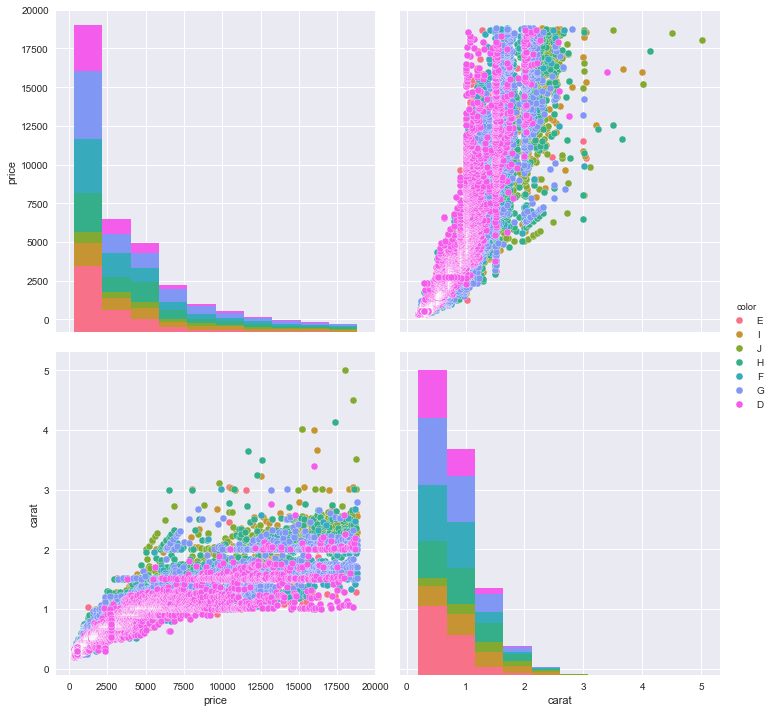

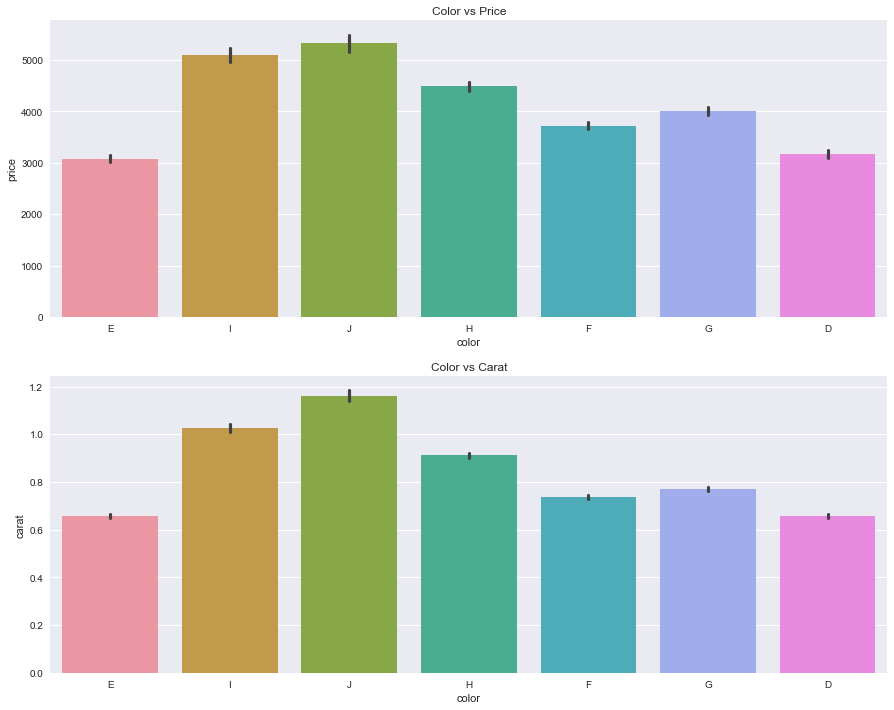

In [18]:
 sns.pairplot(data[["price","carat","color"]], hue="color",size=5, palette="husl")
plt.show()

f, ax = plt.subplots(2,figsize = (15,12))
sns.barplot(x="color",y="price",data = data,ax=ax[0])
sns.barplot(x="color",y="carat",data = data, ax=ax[1])
ax[0].set_title("Color vs Price")
ax[1].set_title("Color vs Carat")
plt.show()

**Conclusions**
- J color diamonds are the most expensive and the heaviest diamonds.
- The two plots are very similar.

Thus, it can be concluded that the heavier diamond is expensive, if only color is considered.

### Comparison of carat with price based on diamond clarity


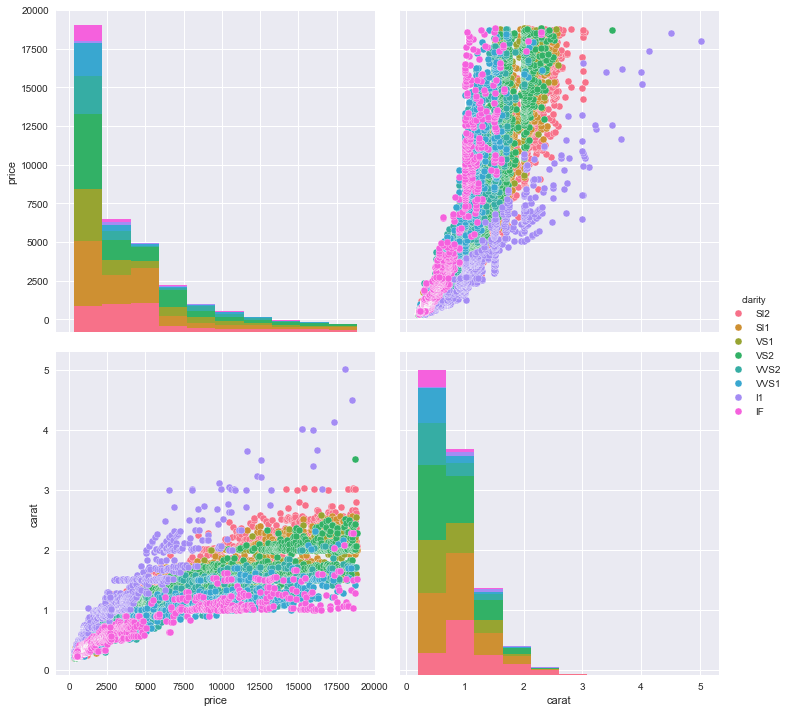

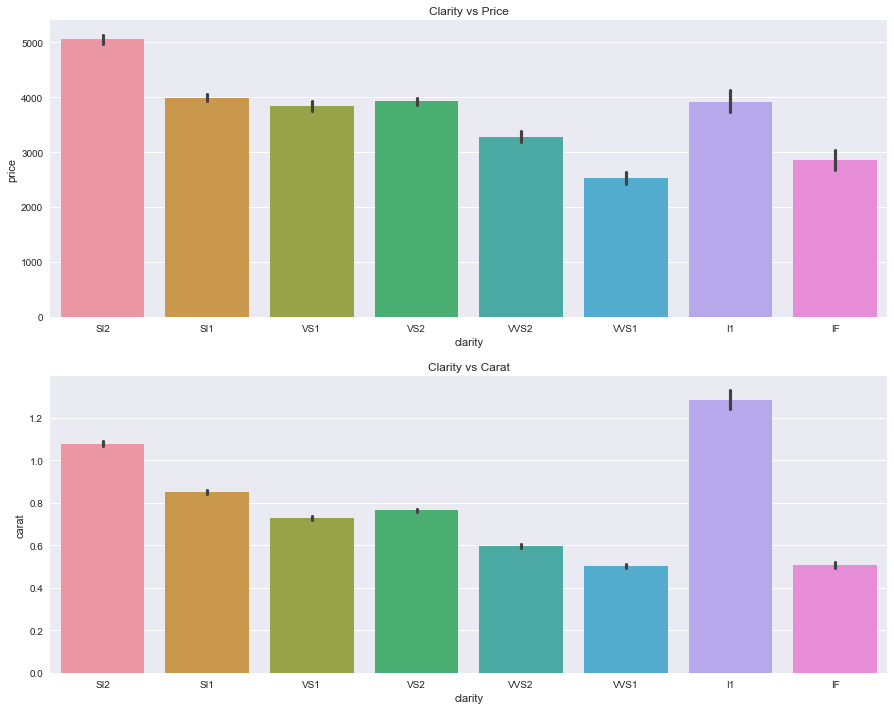

In [19]:
sns.pairplot(data[["price","carat","clarity"]], hue="clarity", size=5)
plt.show()

f, ax = plt.subplots(2,figsize = (15,12))
sns.barplot(x="clarity",y="price",data = data,ax=ax[0])
sns.barplot(x="clarity",y="carat",data = data, ax=ax[1])
ax[0].set_title("Clarity vs Price")
ax[1].set_title("Clarity vs Carat")
plt.show()

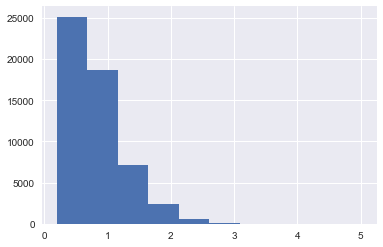

In [20]:
data['carat'].hist()
plt.show()

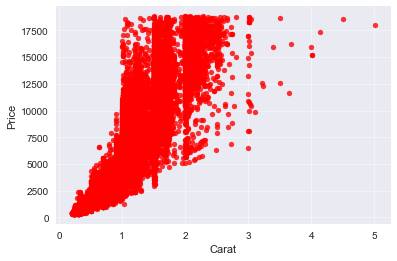

In [21]:
ct=data['carat']
p=data['price']

plt.scatter(ct,p,color='r',marker='.',label="Red",s=100,alpha=0.8) 
plt.xlabel("Carat")
plt.ylabel("Price")
#plt.legend()
plt.grid(alpha=0.4)

plt.show()

### Exploring Correlation between Features

In [22]:
# Corelation
matrix = np.triu(data.corr(), 1) # used for a mask to eliminate the duplicate portion of the correlation matrix

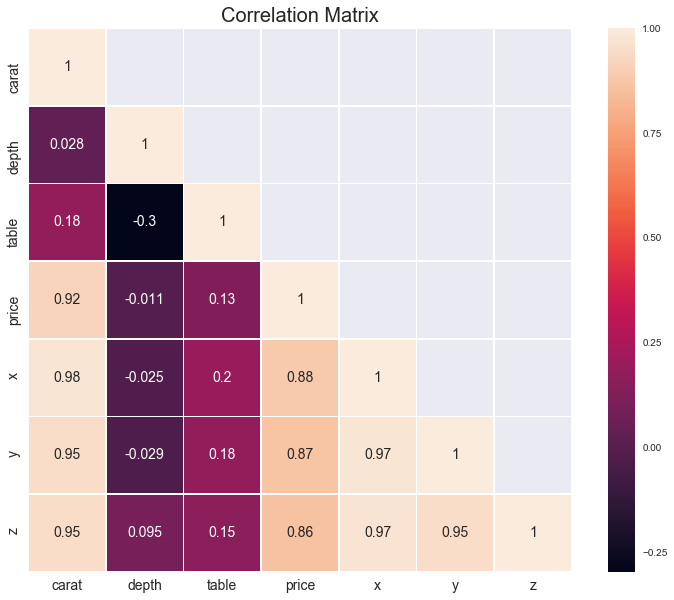

In [23]:
plt.figure(figsize = (13,10))
sns.heatmap(data.corr(), annot = True, square = True, mask = matrix, linewidths = 0.5, annot_kws = {'size': 14})
plt.title('Correlation Matrix', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.show()

**Conclusion**
- Depth and Table have almost no correlation with price of diamond and therefore it can be dropped.
- Price of the diamond and carat weight are highly correlated.
- Carat is one of the main features to predict price of diamond.
- There seems to be some multi-collinearity with some of the independent variables namely carat, x, y and z. 

In [24]:
data.drop(['depth', 'table'], axis = 1, inplace = True)  #dropping the depth and table attribute

In [25]:
data.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [26]:
data.shape

(53940, 8)

In [27]:
data.describe()

,carat,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3932.799722,5.731157,5.734526,3.538734
std,0.474011,3989.439738,1.121761,1.142135,0.705699
min,0.200000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


Observed that the minimum value of x(length), y(width) & z(depth) is zero and 
dimensions like length/width/depth of a diamond cannot be zero.
Also multi-collinearity exists which is not suitable for predicting the price of diamond.

In [28]:
# Dropping these rows
data=data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.shape

(53920, 8)

In [29]:
data.describe()

,carat,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,3930.993231,5.731627,5.734887,3.540046
std,0.473795,3987.280446,1.119423,1.140126,0.702530
min,0.200000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


In [30]:
data.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


#### Label Encoding

In [31]:
data.cut = data.cut.map        (
                                {'Fair': 0,
                                 'Good': 1,
                                 'Very Good': 2,
                                 'Premium': 3,
                                 'Ideal': 4
                                 }
                                )

data.color = data.color.map        (
                                    {'J': 0,
                                     'I': 1,
                                     'H': 2,
                                     'G': 3,
                                     'F': 4,
                                     'E': 5,
                                     'D': 6
                                     }
                                    )

data.clarity = data.clarity.map        (
                                        {'I1': 0,
                                         'SI2': 1,
                                         'SI1': 2,
                                         'VS2': 3,
                                         'VS1': 4,
                                         'VVS2': 5,
                                         'VVS1': 6,
                                         'IF': 7
                                         }
                                        )

data.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,4,5,1,326,3.95,3.98,2.43
1,0.21,3,5,2,326,3.89,3.84,2.31
2,0.23,1,5,4,327,4.05,4.07,2.31
3,0.29,3,1,3,334,4.20,4.23,2.63
4,0.31,1,0,1,335,4.34,4.35,2.75


Here some multicollinearity is suspected. It can be confirmed by checking the Variance Inflation Factor (VIF). Each independent variable is regressed against each indendent variable and the VIF is calculated.

$VIF = \frac{1}{1 - R^2}$

If the independent variable is not dependent on other independent variables, an acceptable VIF will fall between 1 and 5. A VIF greater than 10 is a clear indication that there is some collinearity between the variables.

In [32]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regress carat against all other features
y, X = dmatrices('carat ~ cut + color + clarity +x + y  + z', data, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
VIF = pd.DataFrame()
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIF)

    Features        VIF
0  Intercept  68.412939
1        cut   1.057123
2      color   1.102490
3    clarity   1.215142
4          x  36.063353
5          y  20.491380
6          z  21.269593


In [33]:
data.drop(['x', 'y', 'z'], axis = 1, inplace = True)       # A Higher VIF of dimensions leads to the drop of that attributes

In [34]:
data.head()

,carat,cut,color,clarity,price
0,0.23,4,5,1,326
1,0.21,3,5,2,326
2,0.23,1,5,4,327
3,0.29,3,1,3,334
4,0.31,1,0,1,335


## Establish in- and dependent variables

In [35]:
X = data.drop(['price'], axis = 1)
y = data.price

Splitting the dataset into train and test set in the ratio of 80:20

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 313)

In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print('Accuracy: %0.5f' % (lr.score(X_test, y_test)*100))

Accuracy: 90.06312


### Scatterplot of actual prices against predicted prices

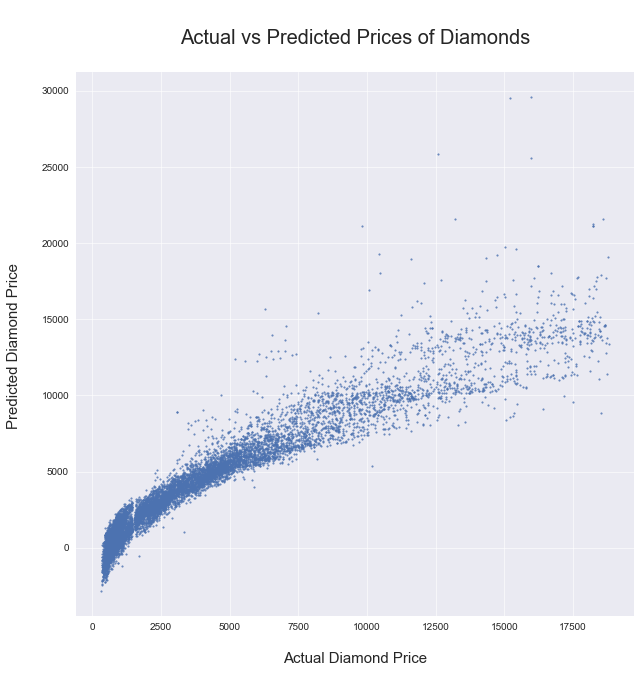

In [38]:
# Plot actual vs prediction (linear regression)
plt.figure(figsize = (10, 10))
plt.scatter(y_test, lr_y_pred, s = 3, alpha=0.8)
plt.xlabel('\nActual Diamond Price', fontsize = 15)
plt.ylabel('Predicted Diamond Price \n', fontsize = 15)
plt.title('\nActual vs Predicted Prices of Diamonds\n', fontsize = 20)
plt.grid(alpha=0.6)
plt.show()

### Determining the degrees of Polynomial Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Determine best number of polynomial degrees
R2 = []
for i in range(1, 8):
    poly_feat = PolynomialFeatures(degree = i)
    X_poly_train = pd.DataFrame(poly_feat.fit_transform(X_train))
    X_poly_test = pd.DataFrame(poly_feat.transform(X_test))
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    y_pred = poly_reg.predict(X_poly_test)
    R2.append(r2_score(y_pred, y_test))
print('Highest R2 =', round(max(R2), 3), 'and occurs when degree =', R2.index(max(R2)) + 1,'.')

Highest R2 = 0.977 and occurs when degree = 5 .


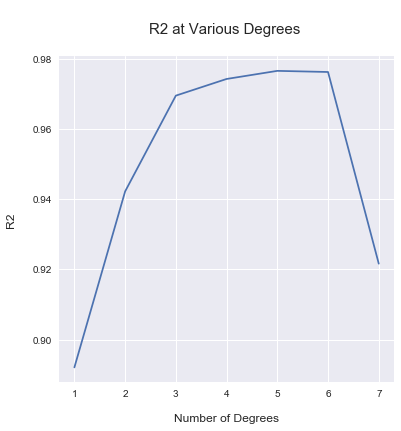

In [40]:
plt.figure(figsize=(6,6))
plt.plot(range(1, 8), R2)
plt.xlabel('\nNumber of Degrees', fontsize = 12)
plt.ylabel('R2 \n', fontsize = 12)
plt.title('\nR2 at Various Degrees \n', fontsize = 15)
plt.show()

### Train/Test the model 

The model is trained on 43,152 instances (80%) and tested on the remaining 10,788 instances (20%). A small amount of L2 penalty was applied to reduce some of the variance introduced by a high degree polynomial algorithm. K-fold cross validation with 4 folds gives a stable performance. This model will likely be able to generalize well to new data.

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

poly_feat = PolynomialFeatures(degree = 5)
X_poly_train = pd.DataFrame(poly_feat.fit_transform(X_train))
X_poly_test = pd.DataFrame(poly_feat.transform(X_test))
poly_reg = Ridge(alpha = 10)
poly_reg.fit(X_poly_train, y_train)
poly_reg_y_pred = poly_reg.predict(X_poly_test)

(print('MODEL METRICS (Train)', 
       '\nR2: %0.5f' % poly_reg.score(X_poly_train, y_train),  
       '\nRMSE: %0.0f' % np.sqrt(mean_squared_error(y_train, poly_reg.predict(X_poly_train))), 
       '\n\nMODEL METRICS (Test)', 
       '\nR2: %0.5f' % poly_reg.score(X_poly_test, y_test), 
       '\nRMSE: %0.0f' % np.sqrt(mean_squared_error(y_test, poly_reg_y_pred)), 
       '\n\nK-FOLD CROSS VALIDATION', '\nR2: %0.5f' % cross_val_score(Ridge(alpha = 10), 
                                                                      X_poly_train, y_train, cv = 4).mean(), '(k = 4)'))


MODEL METRICS (Train) 
R2: 0.97779 
RMSE: 595 

MODEL METRICS (Test) 
R2: 0.97649 
RMSE: 610 

K-FOLD CROSS VALIDATION 
R2: 0.97514 (k = 4)


The $R^2$ approaches 98% with a root mean squared error of 610, approximately 15% of the mean of the target variable.

### Plot the actual prices against the predicted prices

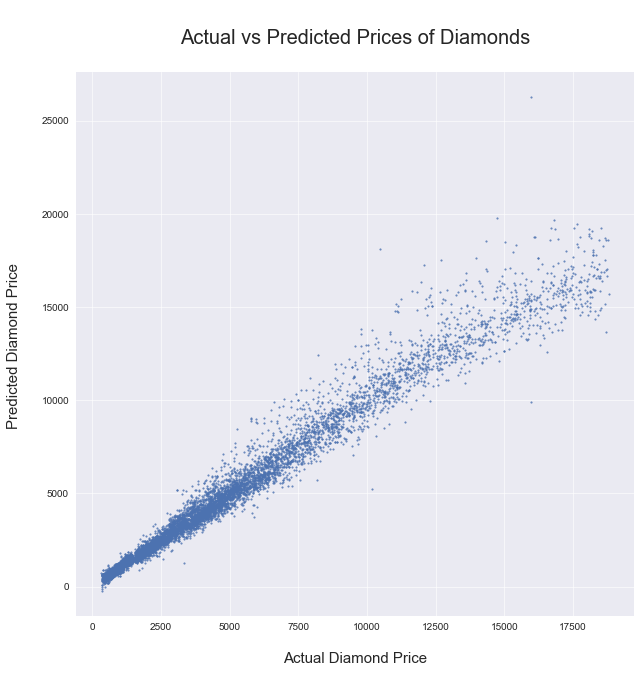

In [42]:
# Plot actual vs prediction (polynomial regression with ridge regularization)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, poly_reg_y_pred, s = 3, alpha=0.8)
plt.xlabel('\nActual Diamond Price', fontsize = 15)
plt.ylabel('Predicted Diamond Price \n', fontsize = 15)
plt.title('\nActual vs Predicted Prices of Diamonds\n', fontsize = 20)
plt.grid(alpha=0.6)
plt.show()

From the new scatterplot, it is easy to see that this model has much better predictive capabilities than the original one!